In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import GradientBoostingRegressor

C:\Users\Neeharika\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Neeharika\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Neeharika\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Neeharika\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Neeharika\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Neeharika\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.star

In [2]:
local_path="D:/Hackathon/train_bFQbE3f/" #setting local path

In [3]:
credit_data= pd.read_csv(local_path + 'train.csv')
credit_data.head(10)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.00,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.00,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.50,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.00,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814
5,4340,current,M,26,233,53819.88,1371.00,4712.92,2220.0,1048.00,...,22.0,20603.0,31189.26,33183.13,7.0,31.0,20890.0,NaN,0.00,626
6,28060,current,F,30,683,1495.00,4237.00,2212.00,5292.0,1964.00,...,24.0,24782.0,27984.33,81517.00,3.0,31.0,50000.0,NaN,0.00,2052
7,746,current,M,32,892,1847.00,5976.00,1347.80,4112.0,669.00,...,19.0,30281.0,39320.36,34332.00,3.0,23.0,31663.0,NaN,0.00,434
8,41628,current,M,37,233,9214.92,NaN,95625.88,16423.0,11419.76,...,28.0,51555.0,285663.35,254939.15,25.0,34.0,92800.0,NaN,0.00,10331
9,16836,saving,M,47,233,9191.31,NaN,8327.55,NaN,14642.00,...,NaN,NaN,NaN,503.00,1.0,0.0,275.0,NaN,0.00,2437


In [4]:
credit_report= pandas_profiling.ProfileReport(credit_data)
credit_report.to_file("credit_report.html")

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
id                       32820 non-null int64
account_type             32820 non-null object
gender                   32820 non-null object
age                      32820 non-null int64
region_code              32820 non-null int64
cc_cons_apr              32820 non-null float64
dc_cons_apr              13768 non-null float64
cc_cons_may              32820 non-null float64
dc_cons_may              15481 non-null float64
cc_cons_jun              32820 non-null float64
dc_cons_jun              11523 non-null float64
cc_count_apr             30421 non-null float64
cc_count_may             31667 non-null float64
cc_count_jun             31230 non-null float64
dc_count_apr             13768 non-null float64
dc_count_may             15481 non-null float64
dc_count_jun             17323 non-null float64
card_lim                 32811 non-null float64
personal_loan_active     2742 non-n

In [6]:
credit_data.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,32820.000000,32820.000000,32820.000000,32820.000000,13768.000000,3.282000e+04,15481.000000,32820.000000,11523.000000,30421.000000,...,30749.000000,30749.000000,2.941500e+04,3.062500e+04,3.127700e+04,31292.000000,31292.000000,3.127700e+04,3.282000e+04,32820.000000
mean,23450.929616,35.951676,554.854327,16661.907189,5727.615837,1.441190e+04,5635.506904,9031.179889,4666.713420,9.162191,...,4.087352,13.934795,4.969688e+04,7.759673e+04,7.583531e+04,5.767736,16.001438,4.474355e+04,9.567620e+03,6824.631840
std,13495.676061,8.529949,188.220317,25138.435416,11544.058014,2.363688e+04,14052.343253,15720.847307,10265.189742,10.790714,...,3.847766,11.455178,1.287256e+05,3.140103e+05,3.062791e+05,4.704716,13.370195,1.215379e+05,2.616736e+05,12459.140593
min,0.000000,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,...,0.000000,0.000000,1.500000e-01,5.230000e+00,1.188000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,11824.750000,31.000000,425.000000,3712.000000,849.000000,2.983298e+03,796.000000,1637.875000,743.000000,3.000000,...,2.000000,6.000000,1.817300e+04,2.509642e+04,2.306400e+04,3.000000,6.000000,1.600000e+04,0.000000e+00,1285.000000
50%,23478.500000,34.000000,575.000000,8912.790000,2282.160000,7.332298e+03,2129.000000,4147.487500,1832.000000,7.000000,...,3.000000,11.000000,3.000000e+04,4.593499e+04,4.295500e+04,5.000000,13.000000,2.687600e+04,1.510650e+02,3141.000000
75%,35096.250000,39.000000,683.000000,19932.060000,6074.600000,1.684785e+04,5640.000000,10126.250000,4607.500000,12.000000,...,5.000000,19.000000,5.000000e+04,8.413612e+04,8.072400e+04,7.000000,22.000000,4.701000e+04,4.176868e+03,7349.250000
max,46886.000000,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,301991.940000,1012.000000,...,71.000000,171.000000,1.285103e+07,3.986881e+07,3.933931e+07,117.000000,164.000000,1.293238e+07,4.468722e+07,408630.000000


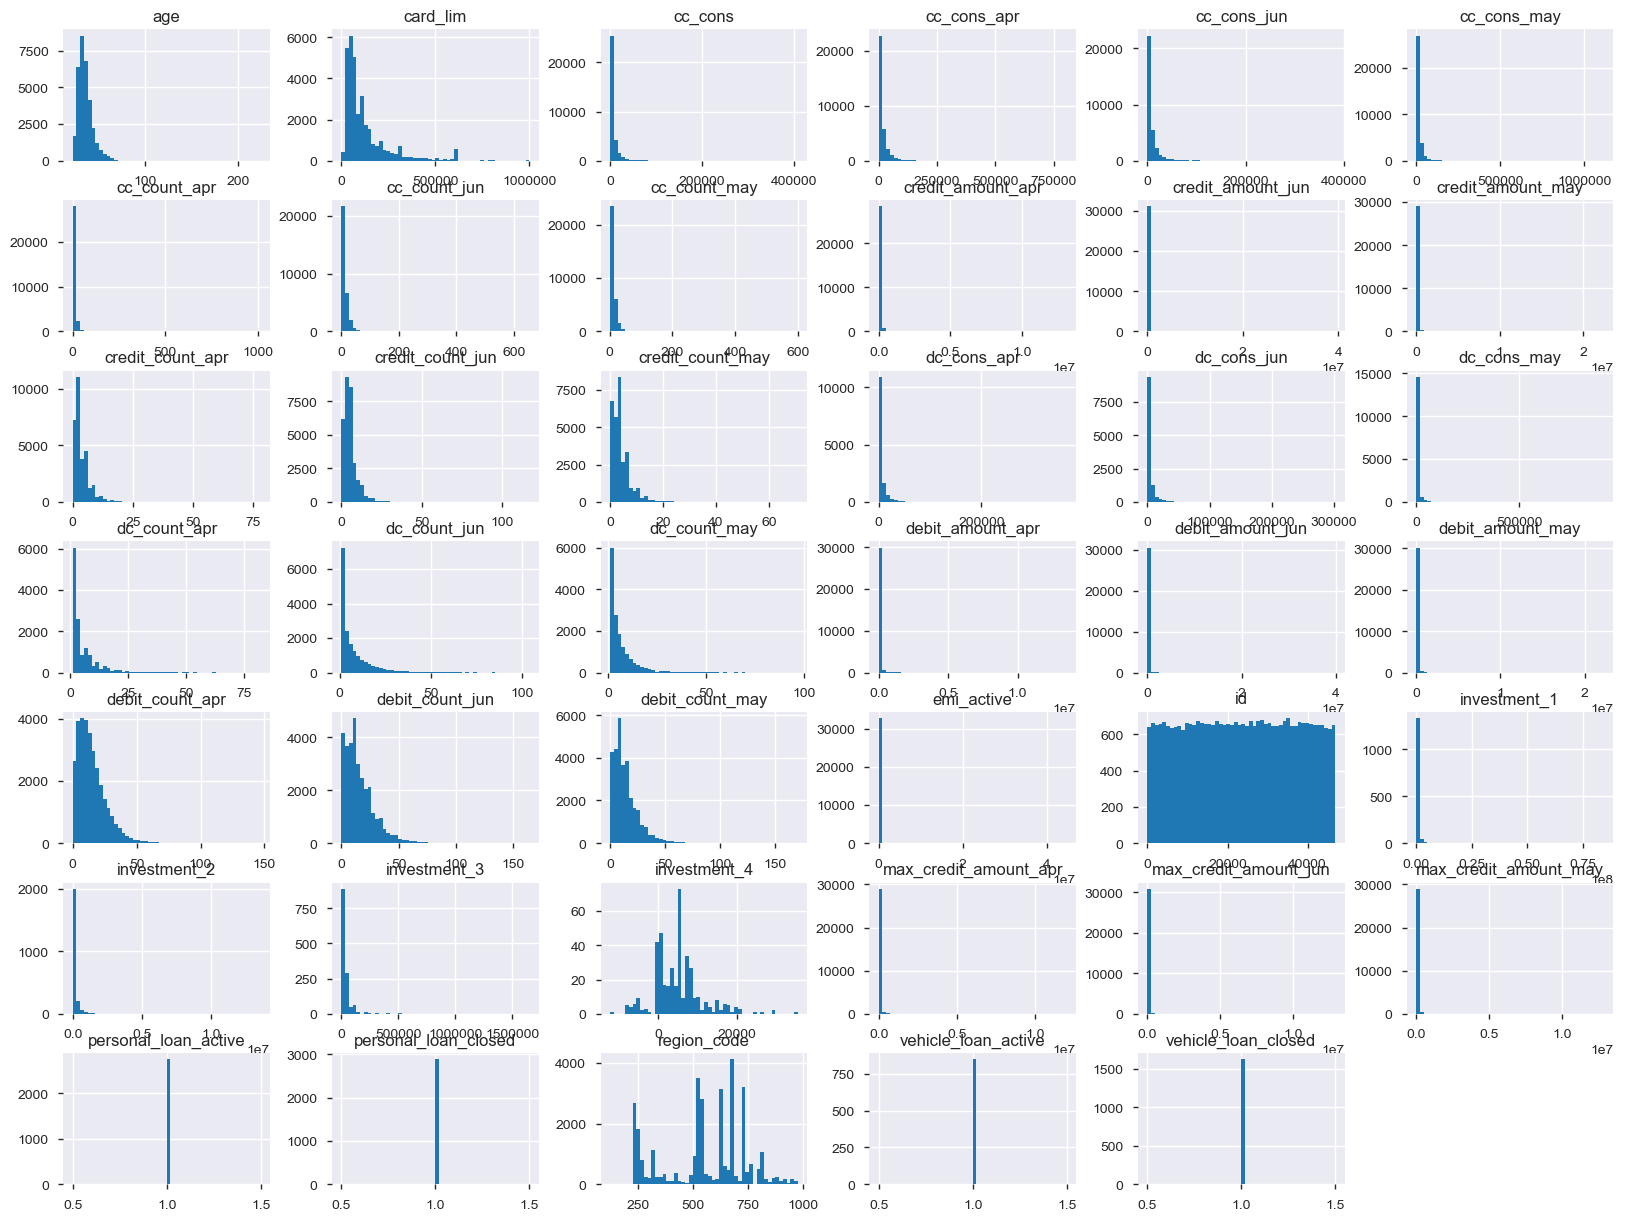

In [7]:
credit_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
credit_data["age_cat"] = pd.cut(credit_data["age"], bins=[0, 25, 35, 45, 60, np.inf], labels=[1, 2, 3, 4, 5]) # creating age categories variable to do stratified sampling 
credit_data.head(10)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,age_cat
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.00,...,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435,5
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.00,...,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921,2
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,...,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970,3
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.50,...,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579,3
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.00,...,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814,2
5,4340,current,M,26,233,53819.88,1371.00,4712.92,2220.0,1048.00,...,20603.0,31189.26,33183.13,7.0,31.0,20890.0,NaN,0.00,626,2
6,28060,current,F,30,683,1495.00,4237.00,2212.00,5292.0,1964.00,...,24782.0,27984.33,81517.00,3.0,31.0,50000.0,NaN,0.00,2052,2
7,746,current,M,32,892,1847.00,5976.00,1347.80,4112.0,669.00,...,30281.0,39320.36,34332.00,3.0,23.0,31663.0,NaN,0.00,434,2
8,41628,current,M,37,233,9214.92,NaN,95625.88,16423.0,11419.76,...,51555.0,285663.35,254939.15,25.0,34.0,92800.0,NaN,0.00,10331,3
9,16836,saving,M,47,233,9191.31,NaN,8327.55,NaN,14642.00,...,NaN,NaN,503.00,1.0,0.0,275.0,NaN,0.00,2437,4


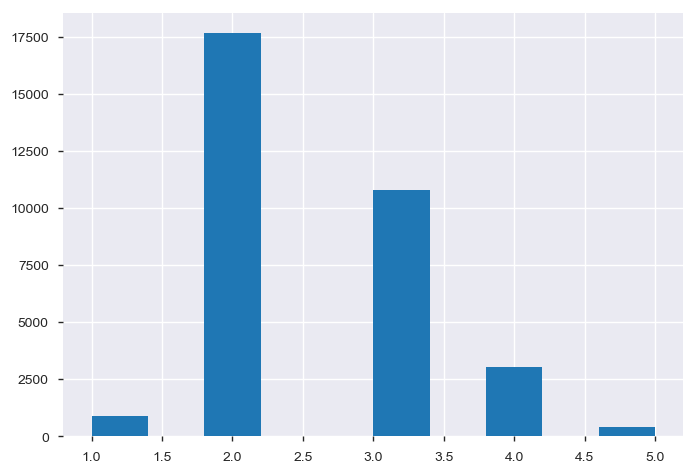

In [9]:
credit_data["age_cat"].hist()

In [10]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(credit_data, credit_data["age_cat"]):
    strat_train_set = credit_data.loc[train_index]
    strat_test_set = credit_data.loc[test_index]

In [11]:
strat_test_set["age_cat"].value_counts()/len(strat_test_set) # see the proportions of age catagories in samples

2    0.538848
3    0.329068
4    0.092779
1    0.026813
5    0.012492
Name: age_cat, dtype: float64

In [12]:
for set_ in (strat_train_set, strat_test_set):  #dropping the age cat variable
    set_.drop("age_cat", axis=1, inplace=True)

In [13]:
credit=strat_train_set.copy()

In [14]:
corr_matrix= credit.corr()

In [15]:
corr_matrix['cc_cons'].sort_values(ascending=False)

cc_cons                  1.000000
cc_cons_jun              0.385082
cc_cons_may              0.337200
cc_cons_apr              0.324950
card_lim                 0.264832
cc_count_jun             0.176278
investment_3             0.167397
cc_count_may             0.166939
credit_amount_may        0.160811
debit_amount_may         0.157803
credit_amount_apr        0.157596
debit_amount_apr         0.156799
max_credit_amount_may    0.148764
max_credit_amount_jun    0.140621
max_credit_amount_apr    0.128828
cc_count_apr             0.124594
credit_amount_jun        0.114037
debit_amount_jun         0.109588
dc_cons_may              0.107223
investment_2             0.098143
age                      0.089842
dc_cons_apr              0.088716
dc_cons_jun              0.083897
emi_active               0.074076
credit_count_apr         0.040856
credit_count_may         0.040716
investment_4             0.036903
dc_count_apr             0.029798
dc_count_jun             0.021586
dc_count_may  

In [16]:
credit["cc_count_3"]= credit["cc_count_may"]+credit["cc_count_apr"]+credit["cc_count_jun"]
credit["total_investment"]= credit["investment_1"]+credit["investment_2"]+credit["investment_3"]+credit["investment_4"]
credit["dd_count_3"]= credit["dc_count_may"]+credit["dc_count_apr"]+credit["dc_count_jun"]  # trying new combinations of features to get more correlation with target variable

In [17]:
corr_matrix['cc_cons'].sort_values(ascending=False)

cc_cons                  1.000000
cc_cons_jun              0.385082
cc_cons_may              0.337200
cc_cons_apr              0.324950
card_lim                 0.264832
cc_count_jun             0.176278
investment_3             0.167397
cc_count_may             0.166939
credit_amount_may        0.160811
debit_amount_may         0.157803
credit_amount_apr        0.157596
debit_amount_apr         0.156799
max_credit_amount_may    0.148764
max_credit_amount_jun    0.140621
max_credit_amount_apr    0.128828
cc_count_apr             0.124594
credit_amount_jun        0.114037
debit_amount_jun         0.109588
dc_cons_may              0.107223
investment_2             0.098143
age                      0.089842
dc_cons_apr              0.088716
dc_cons_jun              0.083897
emi_active               0.074076
credit_count_apr         0.040856
credit_count_may         0.040716
investment_4             0.036903
dc_count_apr             0.029798
dc_count_jun             0.021586
dc_count_may  

In [19]:
credit = strat_train_set.drop("cc_cons", axis=1)
credit_label = strat_train_set["cc_cons"].copy() 

In [20]:
credit["personal_loan_active"].fillna(0, inplace= True)#filling NAN values 
credit["personal_loan_closed"].fillna(0, inplace= True)
credit["vehicle_loan_closed"].fillna(0, inplace= True)
credit["vehicle_loan_active"].fillna(0, inplace= True)
credit["loan_enq"].fillna('N', inplace= True)

In [21]:
credit["dd_count_3"]= credit["dc_count_may"]+credit["dc_count_apr"]+credit["dc_count_jun"]
credit["cc_count_3"]= credit["cc_count_may"]+credit["cc_count_apr"]+credit["cc_count_jun"]

In [22]:
credit.drop("id", axis=1, inplace= True)

In [23]:
credit_num= credit.drop(["loan_enq", "account_type", "gender"], axis = 1)
credit_cat= credit[["loan_enq", "account_type", "gender"]]

In [24]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [25]:
num_attribs = list(credit_num)
cat_attribs = list(credit_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

credit_prep = full_pipeline.fit_transform(credit)

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(credit_prep, credit_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
credit_prediction = lin_reg.predict(credit_prep)   #finding rmse from linear regression
lin_mse= mean_squared_error(credit_label, credit_prediction)
lin_rmse= np.sqrt(lin_mse)
lin_rmse

11134.192964137013

In [28]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std()) #to check cross val score results

In [29]:
lin_scores = cross_val_score(lin_reg, credit_prep, credit_label,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 8987.08017666 11267.79869668 12407.62584044 11576.47972917
 10961.77855982 11209.42555249 11093.42972214 10850.58957257
 11456.5880359  12228.90430206]
Mean: 11203.970018792907
Standard deviation: 884.0992593472648


In [30]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(credit_prep, credit_label)#trying with decision trees

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [31]:
scores = cross_val_score(tree_reg, credit_prep, credit_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)# linear is performing better

Scores: [14420.11214534 17386.73852481 16655.24349888 16979.29491037
 16362.35008903 16995.81769751 16870.02873199 16481.29085273
 16614.40227045 17675.12827568]
Mean: 16644.04069967934
Standard deviation: 833.9456785917079


In [32]:
forest_reg = RandomForestRegressor()
forest_reg.fit(credit_prep, credit_label)#lets try random forest

C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
forest_scores = cross_val_score(forest_reg, credit_prep, credit_label,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 9707.83844037 12247.17494736 13193.666158   12387.36437148
 12170.91849649 12013.47335717 11629.91234338 10992.10299272
 11834.25273962 12700.88734515]
Mean: 11887.75911917289
Standard deviation: 920.0511458269959


In [34]:
svm_reg=LinearSVR(epsilon=1.5)
svm_reg.fit(credit_prep, credit_label)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [35]:
linsvm_scores = cross_val_score(svm_reg, credit_prep, credit_label,
                         scoring="neg_mean_squared_error", cv=10)
linsvm_rmse_scores = np.sqrt(-linsvm_scores)
display_scores(linsvm_rmse_scores)

Scores: [ 9399.50932894 12049.85183963 13394.72966253 12714.98819182
 11880.32128605 11567.17626516 12132.36037273 12215.47358512
 12688.47770904 13515.57443957]
Mean: 12155.846268059593
Standard deviation: 1096.1391445138572


In [36]:
#linear regression is performing better, lets try some more variations
ridge_reg= Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(credit_prep, credit_label)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [37]:
ridge_scores = cross_val_score(ridge_reg, credit_prep, credit_label,
                         scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

Scores: [ 8986.85299472 11267.81563253 12407.58962958 11576.34271952
 10961.71812243 11209.21923297 11093.31592718 10850.6751058
 11456.57518214 12228.92901691]
Mean: 11203.903356376046
Standard deviation: 884.1476792681487


In [38]:
lasso_reg= Lasso(alpha=0.1)
lasso_reg.fit(credit_prep, credit_label)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
lasso_scores = cross_val_score(lasso_reg, credit_prep, credit_label,
                         scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

Scores: [ 8986.78719647 11267.80583938 12407.55566867 11576.08237154
 10961.75275108 11209.10486684 11093.29369274 10850.6387501
 11456.58798721 12229.47873531]
Mean: 11203.908785934473
Standard deviation: 884.2133471848936


In [40]:
elastic_reg= ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(credit_prep, credit_label)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
elastic_scores = cross_val_score(elastic_reg, credit_prep, credit_label,
                         scoring="neg_mean_squared_error", cv=10)
elastic_rmse_scores = np.sqrt(-elastic_scores)
display_scores(elastic_rmse_scores)

Scores: [ 8955.26125552 11264.37349873 12407.0796511  11540.63597705
 10976.92761703 11150.48191141 11086.89439868 10846.8013541
 11475.43668755 12247.1942349 ]
Mean: 11195.10865860571
Standard deviation: 893.2002856672261


In [42]:
param_grid_ridge=[
    {'alpha': [1, 10, 100], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
]

In [43]:
grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [44]:
grid_search_ridge.fit(credit_prep, credit_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='cholesky', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [1, 10, 100],
                          'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                     'sparse_cg', 'sag', 'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [46]:
grid_search_ridge.best_params_

{'alpha': 100, 'solver': 'saga'}

In [47]:
param_grid=[
    {'alpha':[0, 0.1, 1]}
]

In [48]:
grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [49]:
grid_search_lasso.fit(credit_prep, credit_label)

C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1355736081881.6948, tolerance: 360195241.00911355
  positive)
C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None, param_grid=[{'alpha': [0, 0.1, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [50]:
grid_search_lasso.best_params_

{'alpha': 1}

In [51]:
grid_search_elastic = GridSearchCV(elastic_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [52]:
grid_search_elastic.fit(credit_prep, credit_label)

C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1355736081881.6948, tolerance: 360195241.00911355
  positive)
C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None, param_grid=[{'alpha': [0, 0.1, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [53]:
grid_search_elastic.best_params_

{'alpha': 0.1}

In [54]:
#now lets train the model with best parameters
ridge_reg= Ridge(alpha=100, solver="saga")
ridge_reg.fit(credit_prep, credit_label)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='saga', tol=0.001)

In [55]:
ridge_scores = cross_val_score(ridge_reg, credit_prep, credit_label,
                         scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

Scores: [ 8979.90055966 11278.52188022 12409.47562658 11538.25515096
 10971.30479152 11178.97327194 11094.97508736 10840.44904257
 11463.70043593 12237.03788361]
Mean: 11199.25937303465
Standard deviation: 886.0183858546513


In [56]:
lasso_reg= Lasso(alpha=1)
lasso_reg.fit(credit_prep, credit_label)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [57]:
lasso_scores = cross_val_score(lasso_reg, credit_prep, credit_label,
                         scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

Scores: [ 8985.72027261 11267.88386668 12406.96079083 11572.55504003
 10962.50335143 11206.28138151 11092.9040692  10849.98329089
 11456.81447886 12234.76710137]
Mean: 11203.637364341314
Standard deviation: 884.8832812458725


In [58]:
#as we can see ridge regression has improved its performance. now we have 2 models ridge and elastic . lets predict on testset
X_test= strat_test_set.drop("cc_cons", axis=1)
y_test = strat_test_set["cc_cons"].copy()


In [59]:
X_test["personal_loan_active"].fillna(0, inplace= True)
X_test["personal_loan_closed"].fillna(0, inplace= True)
X_test["vehicle_loan_closed"].fillna(0, inplace= True)
X_test["vehicle_loan_active"].fillna(0, inplace= True)
X_test["loan_enq"].fillna('N', inplace= True)

In [60]:
X_test_prepared = full_pipeline.transform(X_test)

test_predictions = ridge_reg.predict(X_test_prepared)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_rmse

C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:628: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return X.loc[:, key]
C:\Users\Neeharika\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


10241.243806136714

In [62]:
X_test_prepared = full_pipeline.transform(X_test)

test_predictions = elastic_reg.predict(X_test_prepared)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_rmse

C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:628: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return X.loc[:, key]
C:\Users\Neeharika\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


10222.75214770093

In [63]:
#lets test these models on our final test set
final_data= pd.read_csv(local_path + 'test.csv')
final_data.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,6975,saving,M,36,447,17942.70,1170.0,1656.00,NaN,4551.00,...,3.0,7.0,10000.0,17316.44,5154.0,2.0,8.0,5000.0,NaN,0.00
1,43223,current,M,31,233,44870.36,NaN,34177.00,NaN,25889.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,45502,current,M,26,823,1073.00,2442.0,4141.00,390.0,6740.29,...,4.0,22.0,26926.0,33981.00,37762.0,3.0,15.0,29352.0,NaN,2885.82
3,12368,current,M,39,878,33060.58,NaN,3797.12,NaN,291.00,...,4.0,8.0,57185.0,52927.00,89425.0,7.0,11.0,32696.0,NaN,0.00
4,40415,current,M,44,404,18236.90,NaN,30513.30,NaN,20395.28,...,1.0,5.0,45000.0,31656.69,34275.0,3.0,4.0,19000.0,NaN,3342.58


In [64]:
final= final_data.drop('id', axis=1)

In [65]:
final["personal_loan_active"].fillna(0, inplace= True)
final["personal_loan_closed"].fillna(0, inplace= True)
final["vehicle_loan_closed"].fillna(0, inplace= True)
final["vehicle_loan_active"].fillna(0, inplace= True)
final["loan_enq"].fillna('N', inplace= True)

In [66]:
final_data_prepared = full_pipeline.transform(final)

C:\Users\Neeharika\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:628: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return X.loc[:, key]
C:\Users\Neeharika\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [67]:
ridge_predictions = ridge_reg.predict(final_data_prepared)

In [68]:
ridge= pd.DataFrame([final_data['id'], ridge_predictions] , index=['id', 'cc_cons'])

In [73]:
ridge_pred=ridge.transpose()

In [74]:
ridge_pred.to_csv('ridge.csv')

In [71]:
net_predictions = elastic_reg.predict(final_data_prepared)

In [75]:
net= pd.DataFrame([final_data['id'], net_predictions] , index=['id', 'cc_cons'])

In [76]:
net_pred=net.transpose()

In [77]:
net_pred.to_csv('net.csv')